In [1]:
!conda install prophet

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::mkl_random==1.2.2=py38hb2f4e1b_0
  - defaults/noarch::cookiecutter==1.7.2=pyhd3eb1b0_0
  - defaults/osx-64::pywavelets==1.1.1=py38haf1e3a3_2
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::bottleneck==1.3.2=py38hf1fa96c_1
  - defaults/osx-64::conda-build==3.18.11=py38_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/noarch::asttokens==2.0.5=pyhd3eb1b0_0
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/osx-64::notebook==6.4.8=py38hecd8cb5_0
  - defaults/noarch::argon2-cffi==21.3.0=pyhd3eb1b0_0
  - defaults/noarch::dask==2022.2.1=pyhd3eb1b0_0
  - defaults/noarch::jupyter_console==6.1.0=py_0
  - defaults/osx-64::mkl-service==2.4.0=py38h9ed2024_0
  - defaults/osx-64::scikit-learn==1.0.2=py38hae1ba45_1
  - de

In [1]:
import pandas as pd
from prophet import Prophet

%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [2]:
gas_path = "data_files/cnooc/中国天然气价格(1).xlsx"

oil_path = "data_files/cnooc/oildata.csv"

gas = pd.read_excel(gas_path)

oil = pd.read_csv(oil_path, parse_dates=['Date']).rename(columns = {"Date":"ds", 'BRENT_OIL_AVG':'y'})[['ds','y']]

In [3]:
df = gas

In [4]:
df.shape

(975, 2)

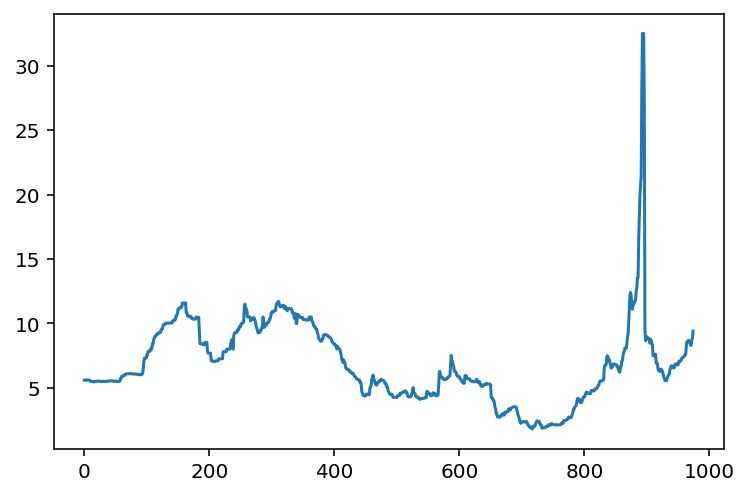

In [5]:
plt.plot(df.y)

In [ ]:
(N, T ,D)   (N, D)

Horizon

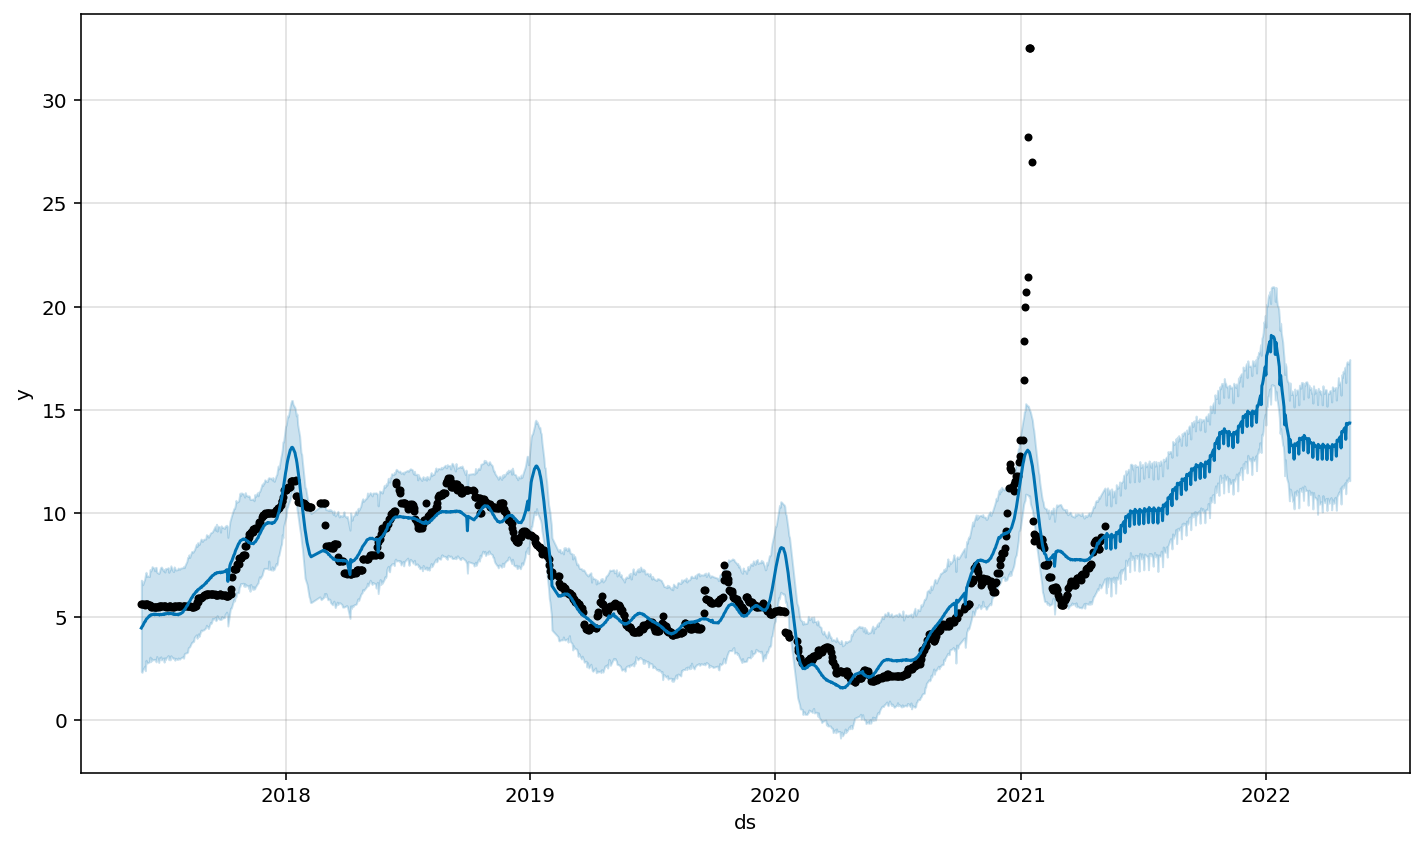

In [6]:
m = Prophet(n_changepoints=100, changepoint_range=1)

m.fit(df)

future = m.make_future_dataframe(periods =365)

forecast = m.predict(future)

clear_output()
_ = m.plot(forecast)